In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (24,6)

In [3]:
df = pd.read_csv('results/scores.csv')
df = df.dropna()

In [4]:
df

,cycle,task,method,instances,features,classes,accuracy,f1,optimization_time,prediction_time,no_features,best_trial
0,0,data/standardized/c_post-operative.csv,Baseline,87,8,3,0.454545,0.312500,4.768372e-07,0.111972,8.0,0
1,0,data/standardized/c_post-operative.csv,Tree Based Filter,87,8,3,0.727273,0.421053,1.029828e-01,0.107043,4.0,0
2,0,data/standardized/c_post-operative.csv,Tree Based Weighting,87,8,3,0.727273,0.421053,1.029828e-01,0.108663,4.0,0
3,0,data/standardized/c_post-operative.csv,L1 Filter,87,8,3,0.454545,0.312500,2.813101e-03,0.106619,8.0,0
4,0,data/standardized/c_post-operative.csv,ReliefF,87,8,3,0.454545,0.312500,5.172014e-03,0.106820,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5770,24,data/standardized/c_pendigits.csv,Forward Selection,10992,16,10,0.912664,0.913125,1.929326e+01,0.167752,7.0,0
5771,24,data/standardized/c_pendigits.csv,Backwards Selection,10992,16,10,0.943595,0.943766,6.342768e+00,0.372348,15.0,0
5772,24,data/standardized/c_pendigits.csv,Stepwise Selection,10992,16,10,0.926492,0.926441,8.453223e+00,0.168952,10.0,0
5773,24,data/standardized/c_pendigits.csv,Bayesian Selection,10992,16,10,0.936317,0.935592,5.282530e+01,0.371279,13.0,38


In [5]:
df[(df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting')].accuracy.value_counts()

1.000000    27
0.629630    27
0.636364    24
0.750000    21
0.977778    21
            ..
0.954876     1
0.945051     1
0.937045     1
0.780347     1
0.948690     1
Name: accuracy, Length: 364, dtype: int64

In [6]:
df[df.method=='Baseline'].groupby(['cycle','task','method']).mean()

instances  features  \
cycle task                                  method                          
0     data/standardized/c_australian.csv    Baseline        690        14   
      data/standardized/c_balance-scale.csv Baseline        625         4   
      data/standardized/c_breast-tissue.csv Baseline        106         9   
      data/standardized/c_breastcancer.csv  Baseline        569        30   
      data/standardized/c_car.csv           Baseline       1728        21   
...                                                         ...       ...   
24    data/standardized/c_transfusion.csv   Baseline        748         4   
      data/standardized/c_vehicle.csv       Baseline        846        17   
      data/standardized/c_votes.csv         Baseline        435        16   
      data/standardized/c_wine.csv          Baseline        178        13   
      data/standardized/c_yeast.csv         Baseline       1479         8   

                                                      classes  accuracy  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline        2  0.878613   
      data/standardized/c_balance-scale.csv Baseline        3  0.878981   
      data/standardized/c_breast-tissue.csv Baseline        6  0.740741   
      data/standardized/c_breastcancer.csv  Baseline        2  0.986014   
      data/standardized/c_car.csv           Baseline        4  0.738426   
...                                                       ...       ...   
24    data/standardized/c_transfusion.csv   Baseline        2  0.780749   
      data/standardized/c_vehicle.csv       Baseline        4  0.646226   
      data/standardized/c_votes.csv         Baseline        2  0.917431   
      data/standardized/c_wine.csv          Baseline        3  0.977778   
      data/standardized/c_yeast.csv         Baseline       10  0.551351   

                                                            f1  \
cycle task                                  method               
0     data/standardized/c_australian.csv    Baseline  0.873118   
      data/standardized/c_balance-scale.csv Baseline  0.609044   
      data/standardized/c_breast-tissue.csv Baseline  0.710159   
      data/standardized/c_breastcancer.csv  Baseline  0.984761   
      data/standardized/c_car.csv           Baseline  0.295433   
...                                                        ...   
24    data/standardized/c_transfusion.csv   Baseline  0.598439   
      data/standardized/c_vehicle.csv       Baseline  0.619697   
      data/standardized/c_votes.csv         Baseline  0.908531   
      data/standardized/c_wine.csv          Baseline  0.980952   
      data/standardized/c_yeast.csv         Baseline  0.308902   

                                                      optimization_time  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline       2.384186e-07   
      data/standardized/c_balance-scale.csv Baseline       2.384186e-07   
      data/standardized/c_breast-tissue.csv Baseline       2.384186e-07   
      data/standardized/c_breastcancer.csv  Baseline       2.384186e-07   
      data/standardized/c_car.csv           Baseline       4.768372e-07   
...                                                                 ...   
24    data/standardized/c_transfusion.csv   Baseline       2.384186e-07   
      data/standardized/c_vehicle.csv       Baseline       2.384186e-07   
      data/standardized/c_votes.csv         Baseline       0.000000e+00   
      data/standardized/c_wine.csv          Baseline       2.384186e-07   
      data/standardized/c_yeast.csv         Baseline       2.384186e-07   

                                                      prediction_time  \
cycle task                                  method                      
0     data/standardized/c_australian.csv    Baseline         0.110590   
      data/standardize

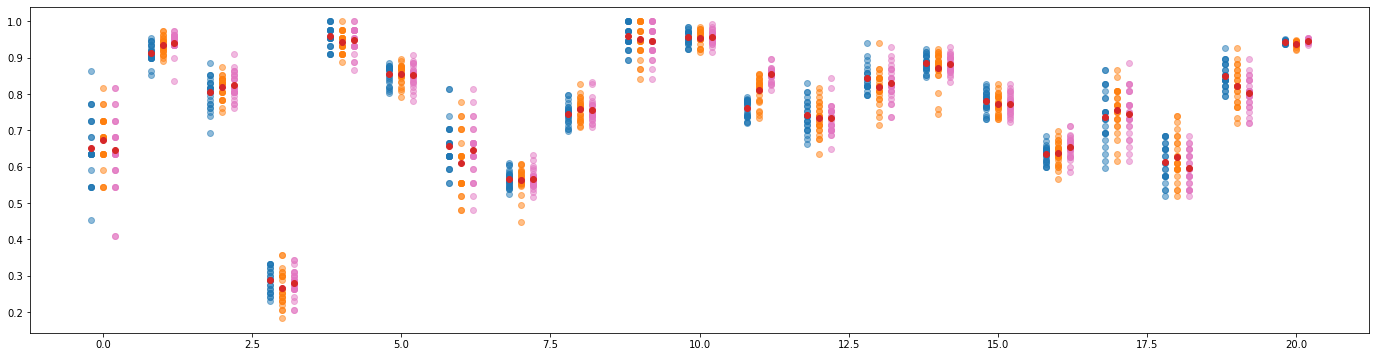

In [7]:
for i, task in enumerate(df.task.unique()):
    plt.scatter([i - 0.2 for _ in range(25)], df[(df.task == task) & (df.method=='Baseline')].accuracy, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(25)], df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy, c='C1', alpha=0.5)
    plt.scatter([i + 0.2 for _ in range(25)], df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy, c='C6', alpha=0.5)
    plt.scatter(i - 0.2, df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), c='C3')
    plt.scatter(i, df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean(), c='C3')
    plt.scatter(i + 0.2, df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean(), c='C3')

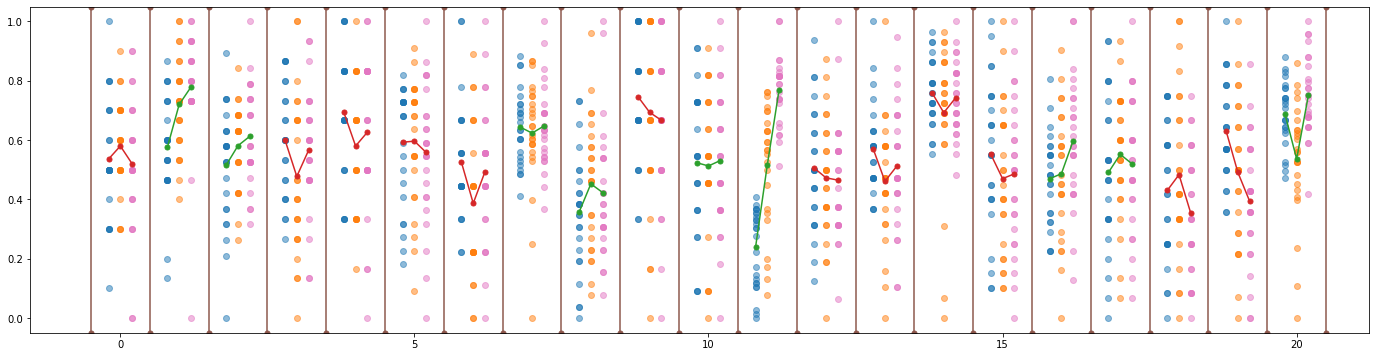

In [8]:
plt.axvline(-0.5, color='C5', marker = 'o', markersize=5)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    lower = df[(df.task == task) & ((df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting'))].accuracy.min()
    higher = df[(df.task == task) & ((df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting'))].accuracy.max()
    delta = higher - lower
    plt.scatter([i-0.2 for _ in range(25)], (df[(df.task == task) & (df.method=='Baseline')].accuracy-lower)/delta, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(25)], (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy-lower)/delta, c='C1', alpha=0.5)
    plt.scatter([i+0.2 for _ in range(25)], (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy-lower)/delta, c='C6', alpha=0.5)
    if b > a:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='Baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()-lower)/delta], c='C2', marker = 'o', markersize=5)
    else:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='Baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Selection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()-lower)/delta], c='C3', marker = 'o', markersize=5)
    plt.axvline(i+0.5, color='C5', marker = 'o', markersize=5)

In [15]:
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    print(task, '\n', a, '\n', b, a > b)

data/standardized/c_post-operative.csv 
 0.6527272727272728 
 0.6454545454545453 True
data/standardized/c_votes.csv 
 0.9141284403669725 
 0.9420183486238533 False
data/standardized/c_ionosphere.csv 
 0.8045454545454546 
 0.8254545454545454 False
data/standardized/c_liver-disorder.csv 
 0.28735632183908044 
 0.2813793103448276 True
data/standardized/c_wine.csv 
 0.9591111111111111 
 0.9502222222222221 True
data/standardized/c_australian.csv 
 0.8557225433526011 
 0.8513294797687863 True
data/standardized/c_breast-tissue.csv 
 0.6562962962962964 
 0.6459259259259259 True
data/standardized/c_yeast.csv 
 0.5669189189189189 
 0.5675675675675675 False
data/standardized/c_pi-diabetes.csv 
 0.74625 
 0.7552083333333335 False
data/standardized/c_iris.csv 
 0.96 
 0.9473684210526316 True
data/standardized/c_breastcancer.csv 
 0.9563636363636364 
 0.9569230769230771 False
data/standardized/c_car.csv 
 0.7618518518518519 
 0.855185185185185 False
data/standardized/c_haberman.csv 
 0.7412987012987

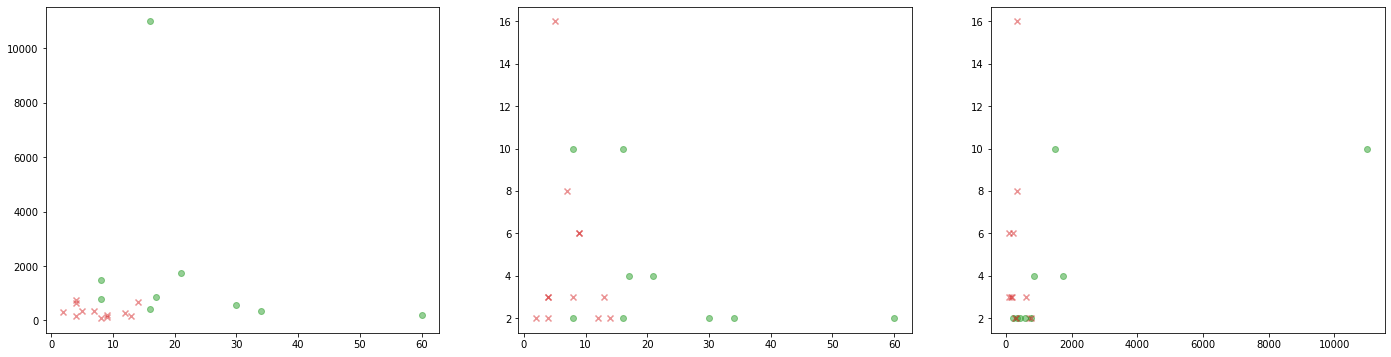

In [10]:
plt.subplot(1,3,1)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, ninstances, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, ninstances, color = 'C2', alpha=0.5)
plt.subplot(1,3,2)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, nclasses, color = 'C2', alpha=0.5)
plt.subplot(1,3,3)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(ninstances, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(ninstances, nclasses, color = 'C2', alpha=0.5)

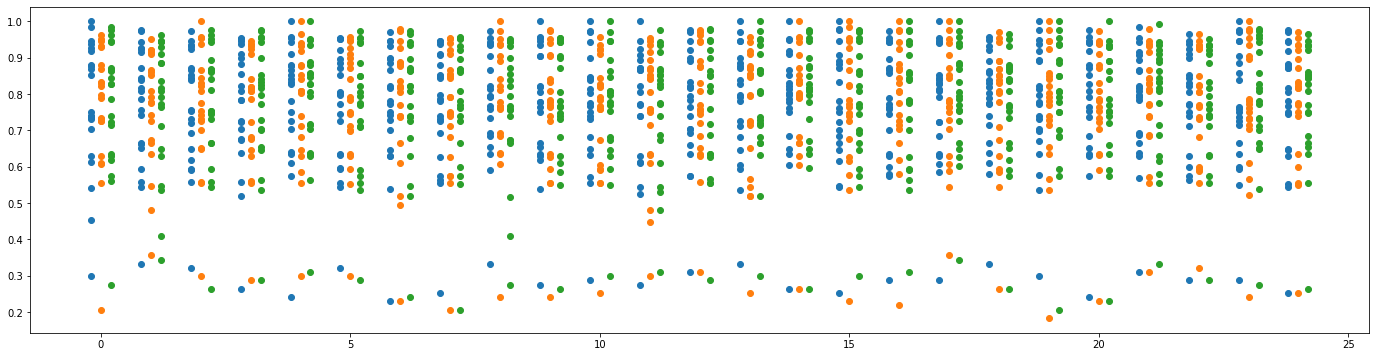

In [11]:
plt.scatter(df[df.method=='Baseline'].cycle - 0.2, df[df.method=='Baseline'].accuracy)
plt.scatter(df[df.method=='Bayesian Selection'].cycle, df[df.method=='Bayesian Selection'].accuracy)
plt.scatter(df[df.method=='Bayesian Weighting'].cycle + 0.2, df[df.method=='Bayesian Weighting'].accuracy)

In [12]:
for method in df.method.unique():
    print(method.ljust(30), df[df.method==method].accuracy.mean(), df[df.method==method].f1.mean())

Baseline                       0.769233807371962 0.6565028479018723
Tree Based Filter              0.7342779076951426 0.6039372037211466
Tree Based Weighting           0.7407472546920278 0.6181735947631775
L1 Filter                      0.7682210735890219 0.6532646335164908
ReliefF                        0.7491418735954662 0.6280231996766484
ReliefF Weighting              0.7359849770446887 0.6173756924522719
Forward Selection              0.7474970389022608 0.6216138116770548
Backwards Selection            0.7629468924853551 0.655734708836234
Stepwise Selection             0.7611451970835251 0.6514850839075652
Bayesian Selection             0.7676278684705425 0.6533390967098217
Bayesian Weighting             0.7708588290178092 0.6600035110601413


In [13]:
ndf = df[df.features < 20]
for method in ndf.method.unique():
    print(method.ljust(30), ndf[ndf.method==method].accuracy.mean(), ndf[ndf.method==method].f1.mean())

Baseline                       0.7584386296681147 0.6496783572920943
Tree Based Filter              0.7255564625718703 0.6050501146453887
Tree Based Weighting           0.7285887252263862 0.610019064887619
L1 Filter                      0.7532959743387341 0.6384207275393644
ReliefF                        0.7340615392689185 0.6153691672414575
ReliefF Weighting              0.7120901004579796 0.5925459065954847
Forward Selection              0.7376668252850407 0.6138893041106795
Backwards Selection            0.7481632973855852 0.6457915733540512
Stepwise Selection             0.7449886220990323 0.6370602974920702
Bayesian Selection             0.7517587672114823 0.637854031388275
Bayesian Weighting             0.7531952209210201 0.6426904640468287
